<a href="https://colab.research.google.com/github/lokeshkumarn/OpenCV/blob/main/OpenCV_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the necessary packages

In [2]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 28.8 MB/s 


In [3]:
!pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 24.5 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
import cv2
import argparse
from __future__ import print_function

In [6]:
print("hello")

hello


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dog_image = cv2.imread('/content/drive/MyDrive/Data/dog.jpg')
print(f"image width is {dog_image.shape[1]} and height is {dog_image.shape[0]}")
print(f"number of channels in dog image is {dog_image.shape[2]}")

image width is 1024 and height is 768
number of channels in dog image is 3


In [13]:
import matplotlib
from matplotlib import pyplot as plt

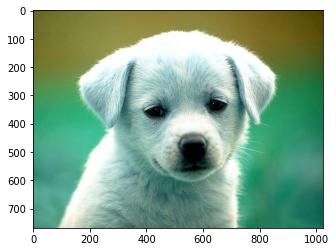

In [14]:
plt.imshow(dog_image)

If we use the Matplotlib imshow instead of cv2.imshow we can see the difference in the original image. so we have to read the cv2 image in a different for that, we create a reusable method to switch the channels, because cv2 reads rgb channel images as bgr, so we have rearrage the channels before displaying or we can write a single method to rearrange and show and also another method just to reverse the channels

In [32]:
def bgr_to_rgb(img_data):
  new_img = img_data[:,:,::-1]
  return new_img

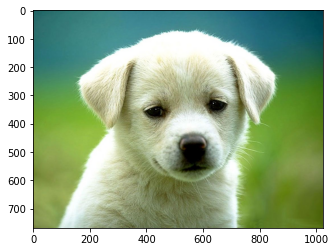

In [33]:
tmp = bgr_to_rgb(dog_image)
plt.imshow(tmp)

above image is the original image

just to cross check the channels values, whether it is reversed or not

In [34]:
tmp[:,:,0]

array([[ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       ...,
       [120, 120, 119, ...,  83,  82,  82],
       [119, 118, 117, ...,  85,  85,  85],
       [118, 118, 117, ...,  84,  84,  85]], dtype=uint8)

In [36]:
dog_image[:,:,2]

array([[ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       [ 71,  65,  56, ...,   2,   3,   3],
       ...,
       [120, 120, 119, ...,  83,  82,  82],
       [119, 118, 117, ...,  85,  85,  85],
       [118, 118, 117, ...,  84,  84,  85]], dtype=uint8)